- classification task
- 9 attributes, 1 categorical (trustLevel), other numerical
- false positive (-25), false positive (-5), true positive (+5)

some observation
- label is unbalanced
- scannedlineitempersecond, valuepersecondsome, itemvoidperposition distribution are skewed
- correlation to label is low
- scannedlineitempersecond highly correlate to valuepersecond

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
train_data = pd.read_csv('data/train.csv', sep = '|')
test_data = pd.read_csv('data/test.csv', sep = '|')
print(f'Train set has {train_data.shape[0]} entries and {train_data.shape[1]} features')
print(f'Test set has {test_data.shape[0]} entries and {test_data.shape[1]} features')
print(f'attributes: \n {test_data.columns}')
print(f'types: \n {train_data.dtypes}')

Train set has 1879 entries and 10 features
Test set has 498121 entries and 9 features
attributes: 
 Index(['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids',
       'scansWithoutRegistration', 'quantityModifications',
       'scannedLineItemsPerSecond', 'valuePerSecond',
       'lineItemVoidsPerPosition'],
      dtype='object')
types: 
 trustLevel                     int64
totalScanTimeInSeconds         int64
grandTotal                   float64
lineItemVoids                  int64
scansWithoutRegistration       int64
quantityModifications          int64
scannedLineItemsPerSecond    float64
valuePerSecond               float64
lineItemVoidsPerPosition     float64
fraud                          int64
dtype: object


In [20]:
for attribute in train_data.columns:
    print(f'{attribute} has {train_data[train_data[attribute].isna()==True].shape[0]} missing value')
    

trustLevel has 0 missing value
totalScanTimeInSeconds has 0 missing value
grandTotal has 0 missing value
lineItemVoids has 0 missing value
scansWithoutRegistration has 0 missing value
quantityModifications has 0 missing value
scannedLineItemsPerSecond has 0 missing value
valuePerSecond has 0 missing value
lineItemVoidsPerPosition has 0 missing value
fraud has 0 missing value


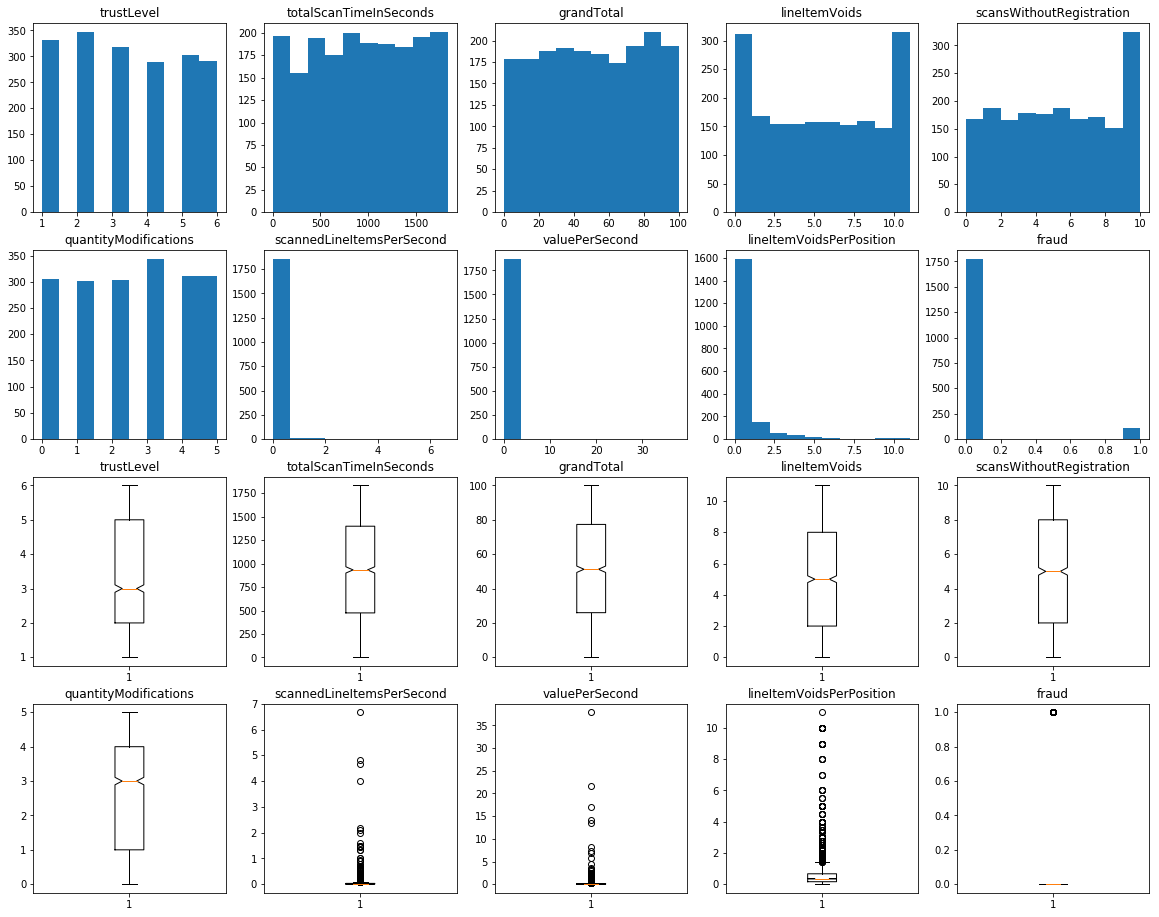

In [60]:
fig = plt.figure(figsize=(20,16))
ax = []
# histogram
for idx, attribute in enumerate(train_data.columns):
    ax.append(fig.add_subplot(4,5,idx+1))
    ax[idx].hist(train_data[attribute], bins=10)
    ax[idx].set_title(attribute)
    
# boxplot
# plt.boxplot(np.array(train_data), labels = train_data.columns)
for idx, attribute in enumerate(train_data.columns):   
    ax.append(fig.add_subplot(4,5,idx+11))
    ax[10+idx].boxplot(train_data[attribute], notch=True)
    ax[10+idx].set_title(attribute)

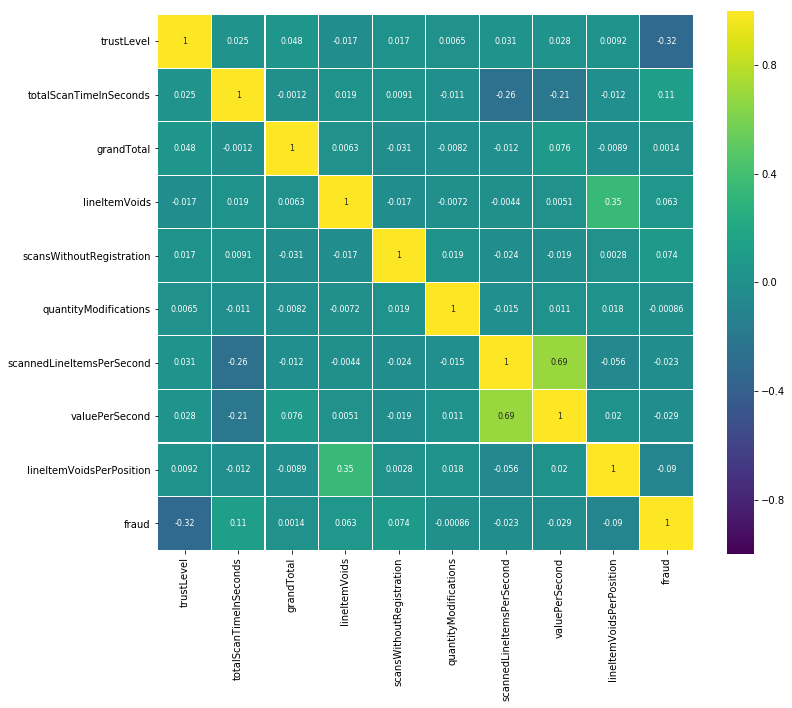

In [50]:
corr =train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);